<a href="https://colab.research.google.com/github/AditiDas1601/CelestPlotter/blob/main/QOSF_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive simulation using matrix multiplication

# Importing the required packages

In [137]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Initialising the matrices required

This is the CNOT matrix that CXGate provides us with in IBM Documentation where the first qubit is the target and the second qubit is the control qubit. We will use this in our circuit. The other CNOT matrix can also be implemented using (P0 ⊗ I) + (P1 ⊗ X ) (where P0 is the projector onto |0> state and P1 is the projector onto |1> state)

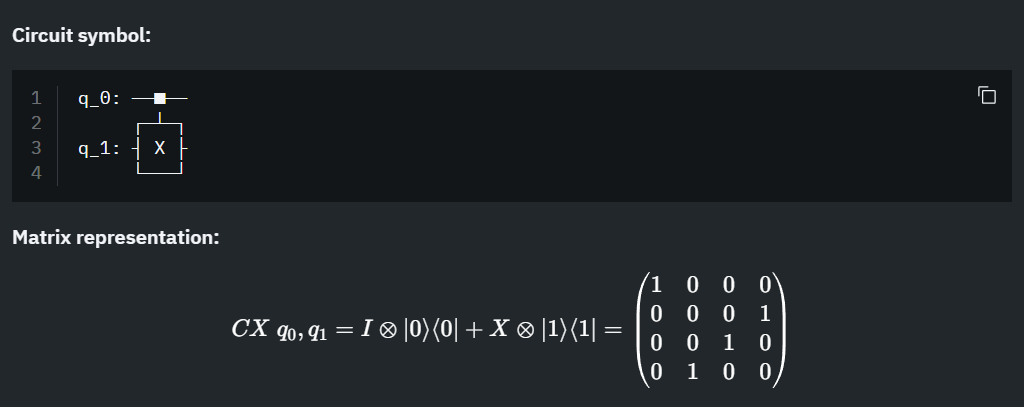

In [138]:
X_gate = np.array([[0, 1], [1, 0]])# X gate matrix
H_gate = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])# H gate matrix
I = np.array([[1, 0], [0, 1]])  # Identity matrix
#CNOT gate for a two-qubit system BUT WE'RE NOT USING THIS MATRIX
CNOT_gate = np.array([[1, 0, 0, 0],
                      [0, 0, 0, 1],
                      [0, 0, 1, 0],
                      [0, 1, 0, 0]])

# Creating initial state for n qubits

In [139]:
def n_qubit_zero_state(n):
    # Starting with the state vector for a single qubit in the |0⟩ state
    qubit_0 = np.array([1, 0])

    # Using the Kronecker product to create an n-qubit |00...0⟩ state
    state = qubit_0
    for _ in range(n - 1):
        state = np.kron(state, qubit_0)
    return state

# Creating n qubit X gate:

In [140]:
def n_qubit_x_gate(n):
  gate_X=X_gate
  for _ in range(n - 1):
        gate_X = np.kron(gate_X, X_gate)
  return gate_X

# Creating n qubit H gate:

In [141]:
def n_qubit_h_gate(n):
  gate_H=H_gate
  for _ in range(n - 1):
        gate_H = np.kron(gate_H, H_gate)
  return gate_H

# Creating n qubit CNOT gate using 2 qubit CNOT matrix:



In [142]:
def n_qubit_cnot_gate(n):
  P0 = np.array([[1, 0], [0, 0]])  # Projector onto |0>
  P1 = np.array([[0, 0], [0, 1]])  # Projector onto |1>
  # For instance, for 3-qubit CNOT = (I ⊗ I ⊗ P0) + (X ⊗I ⊗ P1 )
  #Dividing the sum into two parts: 'first' and 'second'
  first=P0
  second=P1
  for i in range (n-1):
    first=np.kron(I,first)
    if(i==0):
      second=np.kron(X_gate,second)
    else:
      second=np.kron(I,second)
  cnot_gate=first+second
  return cnot_gate

## Computing the sequential circuit and calculating the time it takes as number of qubits increase:

In [143]:
t=np.zeros(13)
for n in range(2,15): # code crashes for number of qubits > 15
  begin = time.time()
  appl_X=np.transpose(np.dot(n_qubit_x_gate(n),n_qubit_zero_state(n)))
  #print(appl_X)
  appl_H=np.transpose(np.dot(n_qubit_h_gate(n),appl_X))
  #print(appl_H)
  appl_CNOT=np.transpose(np.dot(n_qubit_cnot_gate(n),appl_H))
  #print(appl_CNOT)
  end = time.time()
  t[n-2]=(end-begin)

# Plotting the time taken to compute the circuit vs. number of qubits

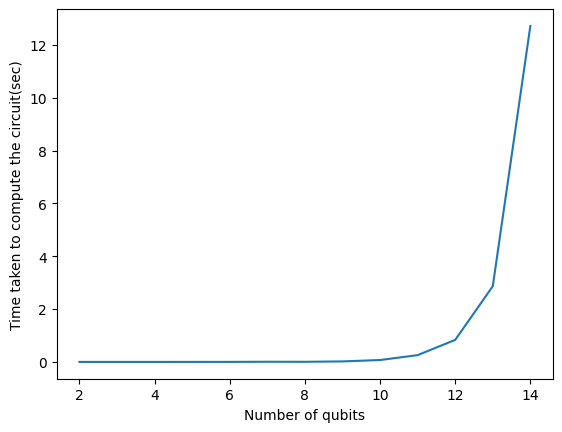

In [144]:
num_qubits=np.arange(2,15)
plt.xlabel('Number of qubits')
plt.ylabel('Time taken to compute the circuit(sec)')
plt.plot(num_qubits, t)
plt.show()

# Demonstrating the sequential circuit being used but for 3 qubits

Installing Qiskit



In [145]:
!pip install qiskit

Demonstrating the circuit done using np.kron() for 3 qubits:

In [146]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(3)
qc.x(0)
qc.h(0)
qc.x(1)
qc.h(1)
qc.x(2)
qc.h(2)
qc.cx(0,2)
qc.measure_all()
qc.draw()

┌───┐┌───┐      ░ ┌─┐      
   q_0: ┤ X ├┤ H ├──■───░─┤M├──────
        ├───┤├───┤  │   ░ └╥┘┌─┐   
   q_1: ┤ X ├┤ H ├──┼───░──╫─┤M├───
        ├───┤├───┤┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ H ├┤ X ├─░──╫──╫─┤M├
        └───┘└───┘└───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [147]:
qc.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)
print(statevector)

Statevector([ 0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
             -0.35355339+0.j, -0.35355339+0.j, -0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))


In [148]:
def n_qubit_tensor(n):
  zero_vector=n_qubit_zero_state(n)
  # Reshape the state vector into an n-dimensional tensor of shape (2, 2, ..., 2)
  tensor_shape = (2,) * n
  print(tensor_shape)
  state_tensor = zero_vector.reshape(tensor_shape)
  return state_tensor

In [156]:
def apply_X_gate(state_tensor,target_qubit):
    X_state_tensor = np.tensordot(X_gate, state_tensor, axes=(1,target_qubit))
    # Move the resulting axis to the correct position
    #new_state_tensor = np.moveaxis(new_state_tensor, 0, target_qubit)
    return X_state_tensor

In [155]:
def apply_H_gate(state_tensor,target_qubit):
    H_state_tensor = np.tensordot(H_gate, state_tensor, axes=(1,target_qubit))
    # Move the resulting axis to the correct position
    #new_state_tensor = np.moveaxis(new_state_tensor, 0, target_qubit)
    return H_state_tensor

In [151]:
CNOT_gate = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 0, 1],
                      [0, 0, 1, 0]]).reshape(2, 2, 2, 2)
print(CNOT_gate)

[[[[1 0]
   [0 0]]

  [[0 1]
   [0 0]]]


 [[[0 0]
   [0 1]]

  [[0 0]
   [1 0]]]]


In [152]:
def apply_CNOT_gate(state_tensor, control_qubit, target_qubit,n_qubits):
    # Generate indices for the state tensor
    indices = ''.join(chr(97 + i) for i in range(n_qubits))  # e.g., 'abcd' for 4 qubits
    gate_indices = 'ij,kl'  # Indices for the gate (2x2x2x2)

    # Construct subscripts for einsum
    subscripts = f'{gate_indices},{indices}->{indices}'

    # Apply the gate using np.tensordot, ensuring axes are aligned
    axes = ([1, 3], [control_qubit, target_qubit])  # Contract over control and target axes
    new_state_tensor = np.tensordot(CNOT_gate, state_tensor, axes=axes)

    # Move the contracted axes back to their original positions
    new_state_tensor = np.moveaxis(new_state_tensor, range(2), [control_qubit, target_qubit])

    return new_state_tensor.reshape((2,) * n_qubits)

In [159]:
def apply_circuit(n):
  state_tensor=n_qubit_tensor(n)
  for qubit in range(n):
    state_tensor = apply_X_gate(state_tensor,target_qubit=qubit)
  for qubit in range(n):
    state_tensor = apply_H_gate(state_tensor,target_qubit=qubit)

  return state_tensor

In [160]:
  print(apply_circuit(3))

(2, 2, 2)
[[[ 0.35355339 -0.35355339]
  [-0.35355339  0.35355339]]

 [[-0.35355339  0.35355339]
  [ 0.35355339 -0.35355339]]]
